# Prior ensemble

In [1]:
%load_ext autoreload
%autoreload 1

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pickle

from popex.popex_objects import CatProb

# geostat simulation and flow classes
from fluvial import FluvialSimulation
from tracer import TracerTest
%aimport fluvial, tracer

import geone

In [2]:
COLOR_SCHEME = [ 
        [x/255 for x in [166,206,227]],
        [x/255 for x in [31,120,180]],
        [x/255 for x in [178,223,138]],
        [x/255 for x in [51,160,44]],
        ]
LEGEND = ['silt', 'fine sand', 'coarse sand', 'gravel']
LEGEND = ['1', '2', '3', '4']
FONT_SIZE = 8
DPI = 300
FIG_DIR = 'figures'

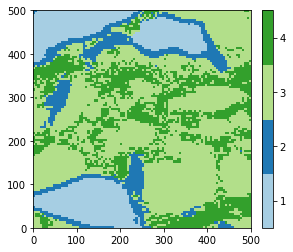

In [3]:
with open('prior/img{}.pickle'.format(0), 'rb') as file_handle:
    img=pickle.load(file_handle)
geone.imgplot.drawImage2D(img,
                          categ=True,
                          categCol=COLOR_SCHEME,
                         )

In [4]:
PRIOR_SIZE = 1000

## Read the results

In [5]:
img_list = []
for i in range(PRIOR_SIZE):
    with open('prior/img{}.pickle'.format(i), 'rb') as file_handle:
        img_list.append(pickle.load(file_handle))

### Prior probability maps

NB: we imposed hard conditioning of category 4 in both wells

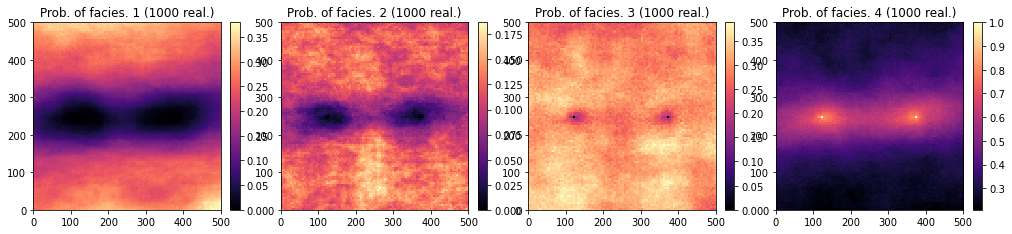

In [6]:
all_sim = geone.img.gatherImages(img_list)

# Do statistics over all the realizations: compute the pixel-wise proportion for the given categories
all_sim_stats = geone.img.imageCategProp(all_sim, [1, 2, 3, 4])

# Display
plt.subplots(1, 4, figsize=(17,5)) # 1 x 3 sub-plots
for i in range(4):
    plt.subplot(1, 4, i+1) # select next sub-plot
    geone.imgplot.drawImage2D(all_sim_stats, cmap='magma', iv=i,
                       title='Prob. of facies. {} ({} real.)'.format(i+1, len(img_list)))
    #plt.plot(hd.x(), hd.y(), '+', markersize=20, c='white') # add hard data points

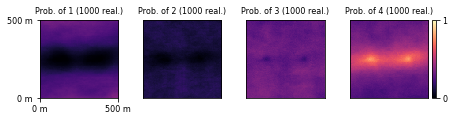

In [7]:
# Display
plt.subplots(1, 4, figsize=(7.08661417,2)) # 1 x 3 sub-plots
for i in range(4):
    plt.subplot(1, 4, i+1) # select next sub-plot
    geone.imgplot.drawImage2D(all_sim_stats,
                              cmap='magma',
                              iv=i,

                              removeColorbar= (False if i == 3 else True),
                              xticks=[0,500] if i==0 else [],
                              yticks=[0,500] if i==0 else [],
                              xticklabels=['0 m', '500 m'] if i==0 else [],
                              yticklabels=['0 m', '500 m'] if i==0 else [],
                              title_fontsize=FONT_SIZE,
                            vmin=0,
                              vmax=1.0,
                              cticks = [0,1],
                                    cticklabels=['0', '1'],
                                cticklabels_fontsize=FONT_SIZE,
                                xlabels_fontsize=FONT_SIZE,
                                ylabels_fontsize=FONT_SIZE,
                                xticklabels_fontsize=FONT_SIZE,
                                yticklabels_fontsize=FONT_SIZE,
                       title='Prob. of {} ({} real.)'.format(i+1, len(img_list)))
    #plt.plot(hd.x(), hd.y(), '+', markersize=20, c='white') # add hard data points
    
    plt.savefig(f'{FIG_DIR}/qcat.eps', dpi=DPI)

## Convert prior maps for popex-format

In [8]:
param_val = np.vstack([ all_sim_stats.val[i,0,:,:].reshape(-1) for i in range(4) ]).transpose()

In [9]:
categories = [[(0.5, 1.5)], [(1.5, 2.5)], [(2.5, 3.5)], [(3.5, 4.5)]]

In [10]:
# write qcat.prob according to popex
qcatprob = CatProb('float64', param_val, categories)
with open('q_cat.prob', 'wb') as file_handle:
    pickle.dump((qcatprob,), file_handle)

## Concentrations

In [11]:
def get_pickle(name):
    result = None
    try:
        with open(name, 'rb') as file_handle:
            result = pickle.load(file_handle)
    except FileNotFoundError as e:
        print(f'{name} failed: {str(e)}')
    return result

In [12]:
concentration_tuple = tuple(get_pickle(f'prior-modflow/f-{i}-concentration.pickle') for i in range(PRIOR_SIZE))

In [13]:
concentration_array = np.array(concentration_tuple)

In [14]:
concentration_ref = get_pickle('ref/measurement-4.pickle')
times = get_pickle('ref/times.pickle')

In [15]:
quants = np.quantile(concentration_array, [0.05, 0.5, 0.95], axis=0)

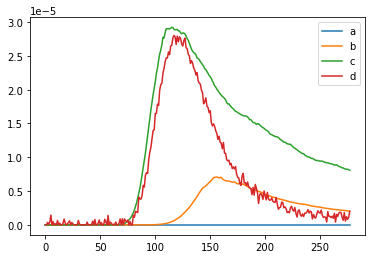

In [16]:
plt.plot(quants[0,:])
plt.plot(quants[1,:])
plt.plot(quants[2,:])
plt.plot(concentration_ref)
plt.legend(['a','b','c','d'])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


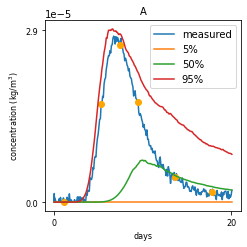

In [17]:
plt.figure(figsize=(3.54330709,3.54330709))
ind = [50,100, 125, 150, 200, 250]
plt.xticks([0,20], size=8)
plt.yticks([0,2.9e-5],size=8)
plt.ylabel("concentration (kg/m$^3$)", size=8)
plt.xlabel("days", size=8)
#plt.yticklabels(['0','6'])
#plt.xticklabels_fontsize(FONT_SIZE)
#plt.yticklabels_fontsize(FONT_SIZE)
plt.title('A', size=10)
plt.plot(np.array(times)/3600/24, concentration_ref, zorder=-1)

plt.scatter((np.array(times)/3600/24)[ind], concentration_ref[ind], c='orange', zorder=1)
plt.plot(np.array(times)/3600/24,quants[0,:])
plt.plot(np.array(times)/3600/24,quants[1,:])
plt.plot(np.array(times)/3600/24,quants[2,:])
plt.legend(['measured','5%','50%', '95%'])
plt.tight_layout()
plt.savefig(f'{FIG_DIR}/prior-concentration.eps', dpi=DPI)

In [18]:
zone_tuple = tuple(get_pickle(f'prior-modpath/z-{i}-zone.pickle') for i in range(PRIOR_SIZE))

prior-modpath/z-89-zone.pickle failed: [Errno 2] No such file or directory: 'prior-modpath/z-89-zone.pickle'
prior-modpath/z-331-zone.pickle failed: [Errno 2] No such file or directory: 'prior-modpath/z-331-zone.pickle'
prior-modpath/z-353-zone.pickle failed: [Errno 2] No such file or directory: 'prior-modpath/z-353-zone.pickle'
prior-modpath/z-689-zone.pickle failed: [Errno 2] No such file or directory: 'prior-modpath/z-689-zone.pickle'
prior-modpath/z-731-zone.pickle failed: [Errno 2] No such file or directory: 'prior-modpath/z-731-zone.pickle'
prior-modpath/z-760-zone.pickle failed: [Errno 2] No such file or directory: 'prior-modpath/z-760-zone.pickle'
prior-modpath/z-842-zone.pickle failed: [Errno 2] No such file or directory: 'prior-modpath/z-842-zone.pickle'


In [19]:
def zone_to_field(zone):
    field = np.zeros((101,101))
    if zone is None:
        return field[:100,:100]
    else:    
        for x, y in zip(zone['x0'], zone['y0']):
            field[int((y)/5),int((x)/5)] = 1
    smeared_field = field[:100,:100] + field[1:,1:] + field[:100,1:] + field[1:,:100]
    smeared_field[smeared_field>0] = 1
    return smeared_field[:100,:100]

In [20]:
all_fields = np.stack([zone_to_field(zone) for zone in zone_tuple if zone is not None],axis=0)

In [21]:
field_ref = zone_to_field(get_pickle(name='reference-modpath/modpath-zone.pickle'))

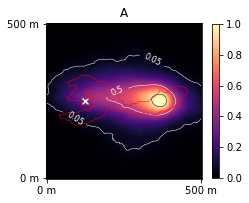

In [22]:
plt.figure(figsize=(3.54330709,3.54330709))
proba_map = np.flip(np.mean(all_fields, axis=0), axis=0)
plt.imshow(proba_map, origin='lower', cmap='magma')
plt.colorbar(shrink=0.66)
cs = plt.contour(proba_map, colors=['white', 'white', 'black'], linewidths=[0.5],levels=[0.05, 0.5,0.95])
plt.clabel(cs, levels = [0.05, 0.5, 0.95], fmt={0.05:'0.05',0.5:'0.5', 0.95:'0.95'}, fontsize=8)
plt.contour(field_ref, colors=['red'], linewidths=[0.5], levels=[0.99])
plt.xticks([0, 99], labels=['0 m', '500 m'])
plt.yticks([0, 99], labels=['0 m', '500 m'])
plt.scatter(24.5, 49.5, marker='x', color='white')
plt.title('A')
plt.tight_layout()
plt.savefig(f'{FIG_DIR}/prior-map.eps', dpi=DPI)